<a href="https://colab.research.google.com/github/muskanalirizvi/-Internboot/blob/main/Task_2%20BEGINNER%20LEVEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


**2. Load the Dataset**

In [ ]:
df = pd.read_csv("train.csv")   # change to your file path
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.shape

(3000888, 6)

**3. Convert Date Column to Datetime**

In [ ]:
df['date'] = pd.to_datetime(df['date'])


**4. Aggregate Daily Sales → Weekly + Monthly Sales**

In [ ]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()


**5. Compute Moving Averages**
**7-day (weekly) rolling average**

In [ ]:
daily_sales['weekly_ma'] = daily_sales['sales'].rolling(window=7).mean()


**30-day (monthly) rolling average**

In [ ]:
daily_sales['monthly_ma'] = daily_sales['sales'].rolling(window=30).mean()


**6. Compare Forecast vs Actual**

In [ ]:
daily_sales['forecast_weekly'] = daily_sales['weekly_ma'].shift(1)
daily_sales['forecast_monthly'] = daily_sales['monthly_ma'].shift(1)


**7. Plot Trend Lines**

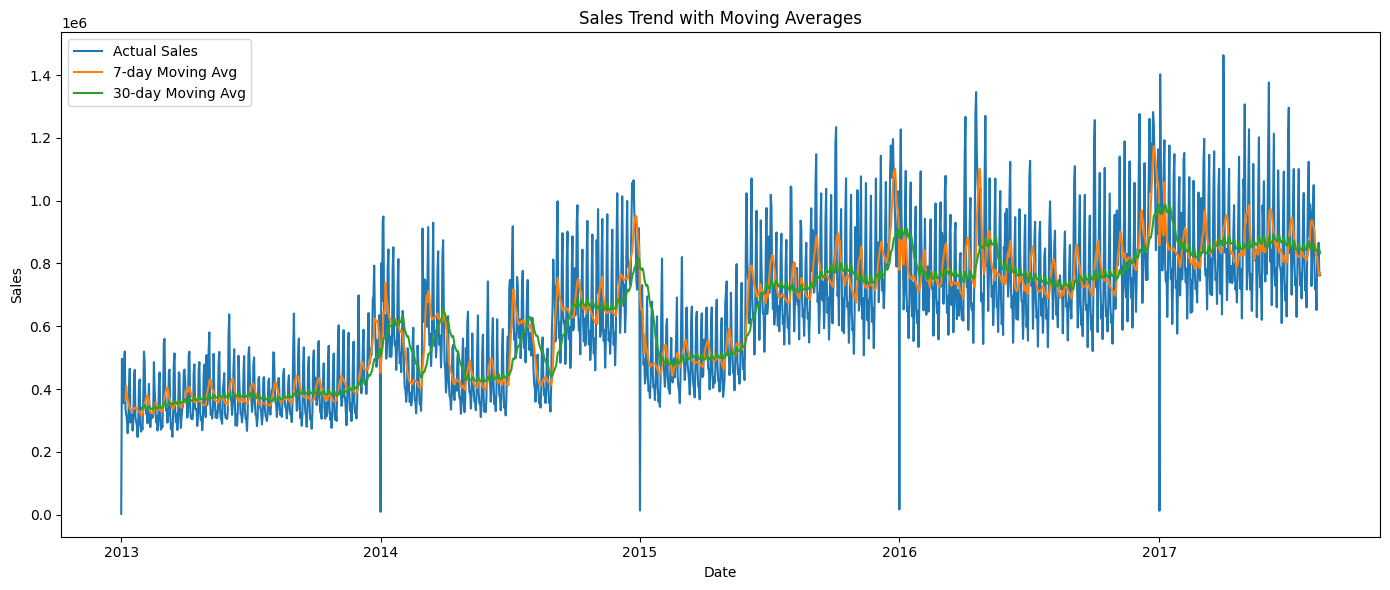

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales')
plt.plot(daily_sales['date'], daily_sales['weekly_ma'], label='7-day Moving Avg')
plt.plot(daily_sales['date'], daily_sales['monthly_ma'], label='30-day Moving Avg')

plt.title("Sales Trend with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()
